In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes_data_upload.csv')
#df_encoded = pd.get_dummies(df)

In [50]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [51]:
df.describe(include='all') .T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,520,NaN,NaN,NaN,48.0288,12.1515,16,39,47.5,57,90
Gender,520,2,Male,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polyuria,520,2,No,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polydipsia,520,2,No,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sudden weight loss,520,2,No,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weakness,520,2,Yes,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Polyphagia,520,2,No,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genital thrush,520,2,No,404,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visual blurring,520,2,No,287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Itching,520,2,No,267,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.groupby('class').size()


class
Negative    200
Positive    320
dtype: int64

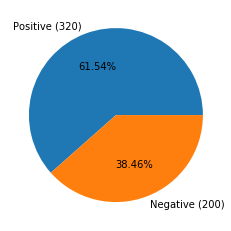

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
#df= pd.read_csv('COVIDFakeNEWSDATA.csv')
pi_plot=df['class'].value_counts()
plt.pie(pi_plot, labels=['Positive (320)', 'Negative (200)'], 
autopct='%.2f%%')
plt.show()

In [53]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [2]:
from sklearn.preprocessing import LabelEncoder
Le_x=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)

In [55]:
df.shape

(520, 17)

In [56]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,15,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,24,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [57]:
df.describe(include='all') .T

,count,mean,std,min,25%,50%,75%,max
Age,520.0,23.905769,11.754586,0.0,15.0,23.5,33.0,50.0
Gender,520.0,0.630769,0.483061,0.0,0.0,1.0,1.0,1.0
Polyuria,520.0,0.496154,0.500467,0.0,0.0,0.0,1.0,1.0
Polydipsia,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
sudden weight loss,520.0,0.417308,0.493589,0.0,0.0,0.0,1.0,1.0
weakness,520.0,0.586538,0.492928,0.0,0.0,1.0,1.0,1.0
Polyphagia,520.0,0.455769,0.498519,0.0,0.0,0.0,1.0,1.0
Genital thrush,520.0,0.223077,0.416710,0.0,0.0,0.0,0.0,1.0
visual blurring,520.0,0.448077,0.497776,0.0,0.0,0.0,1.0,1.0
Itching,520.0,0.486538,0.500300,0.0,0.0,0.0,1.0,1.0


In [3]:
y=df.iloc[:,-1]
x1=df.iloc[:,1:-1]

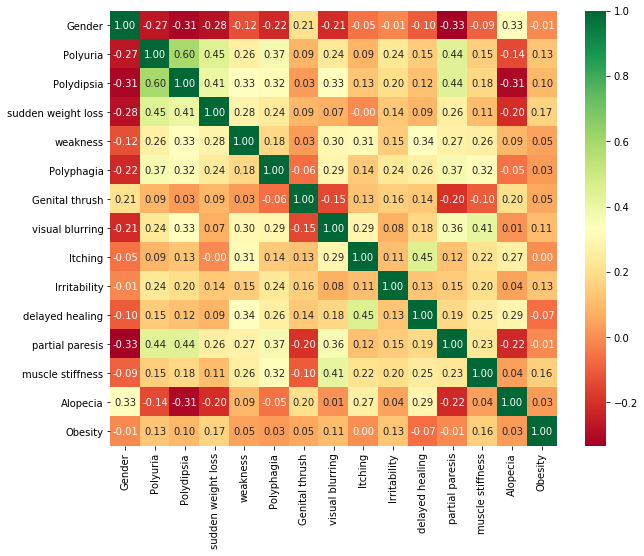

In [6]:
import seaborn as sns
sns.heatmap(
    data=x1.corr(),
    annot=True,
    fmt='.2f',
    cmap='RdYlGn'
)
fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

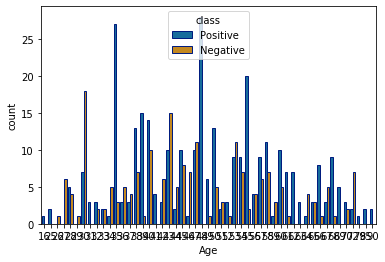

In [45]:
sns.countplot(x='Age',hue='class',data=df, palette='colorblind', edgecolor=sns.color_palette('dark',n_colors=1))

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.33, random_state=44, shuffle =True)
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [8]:
y_pred=dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)[:, 1]

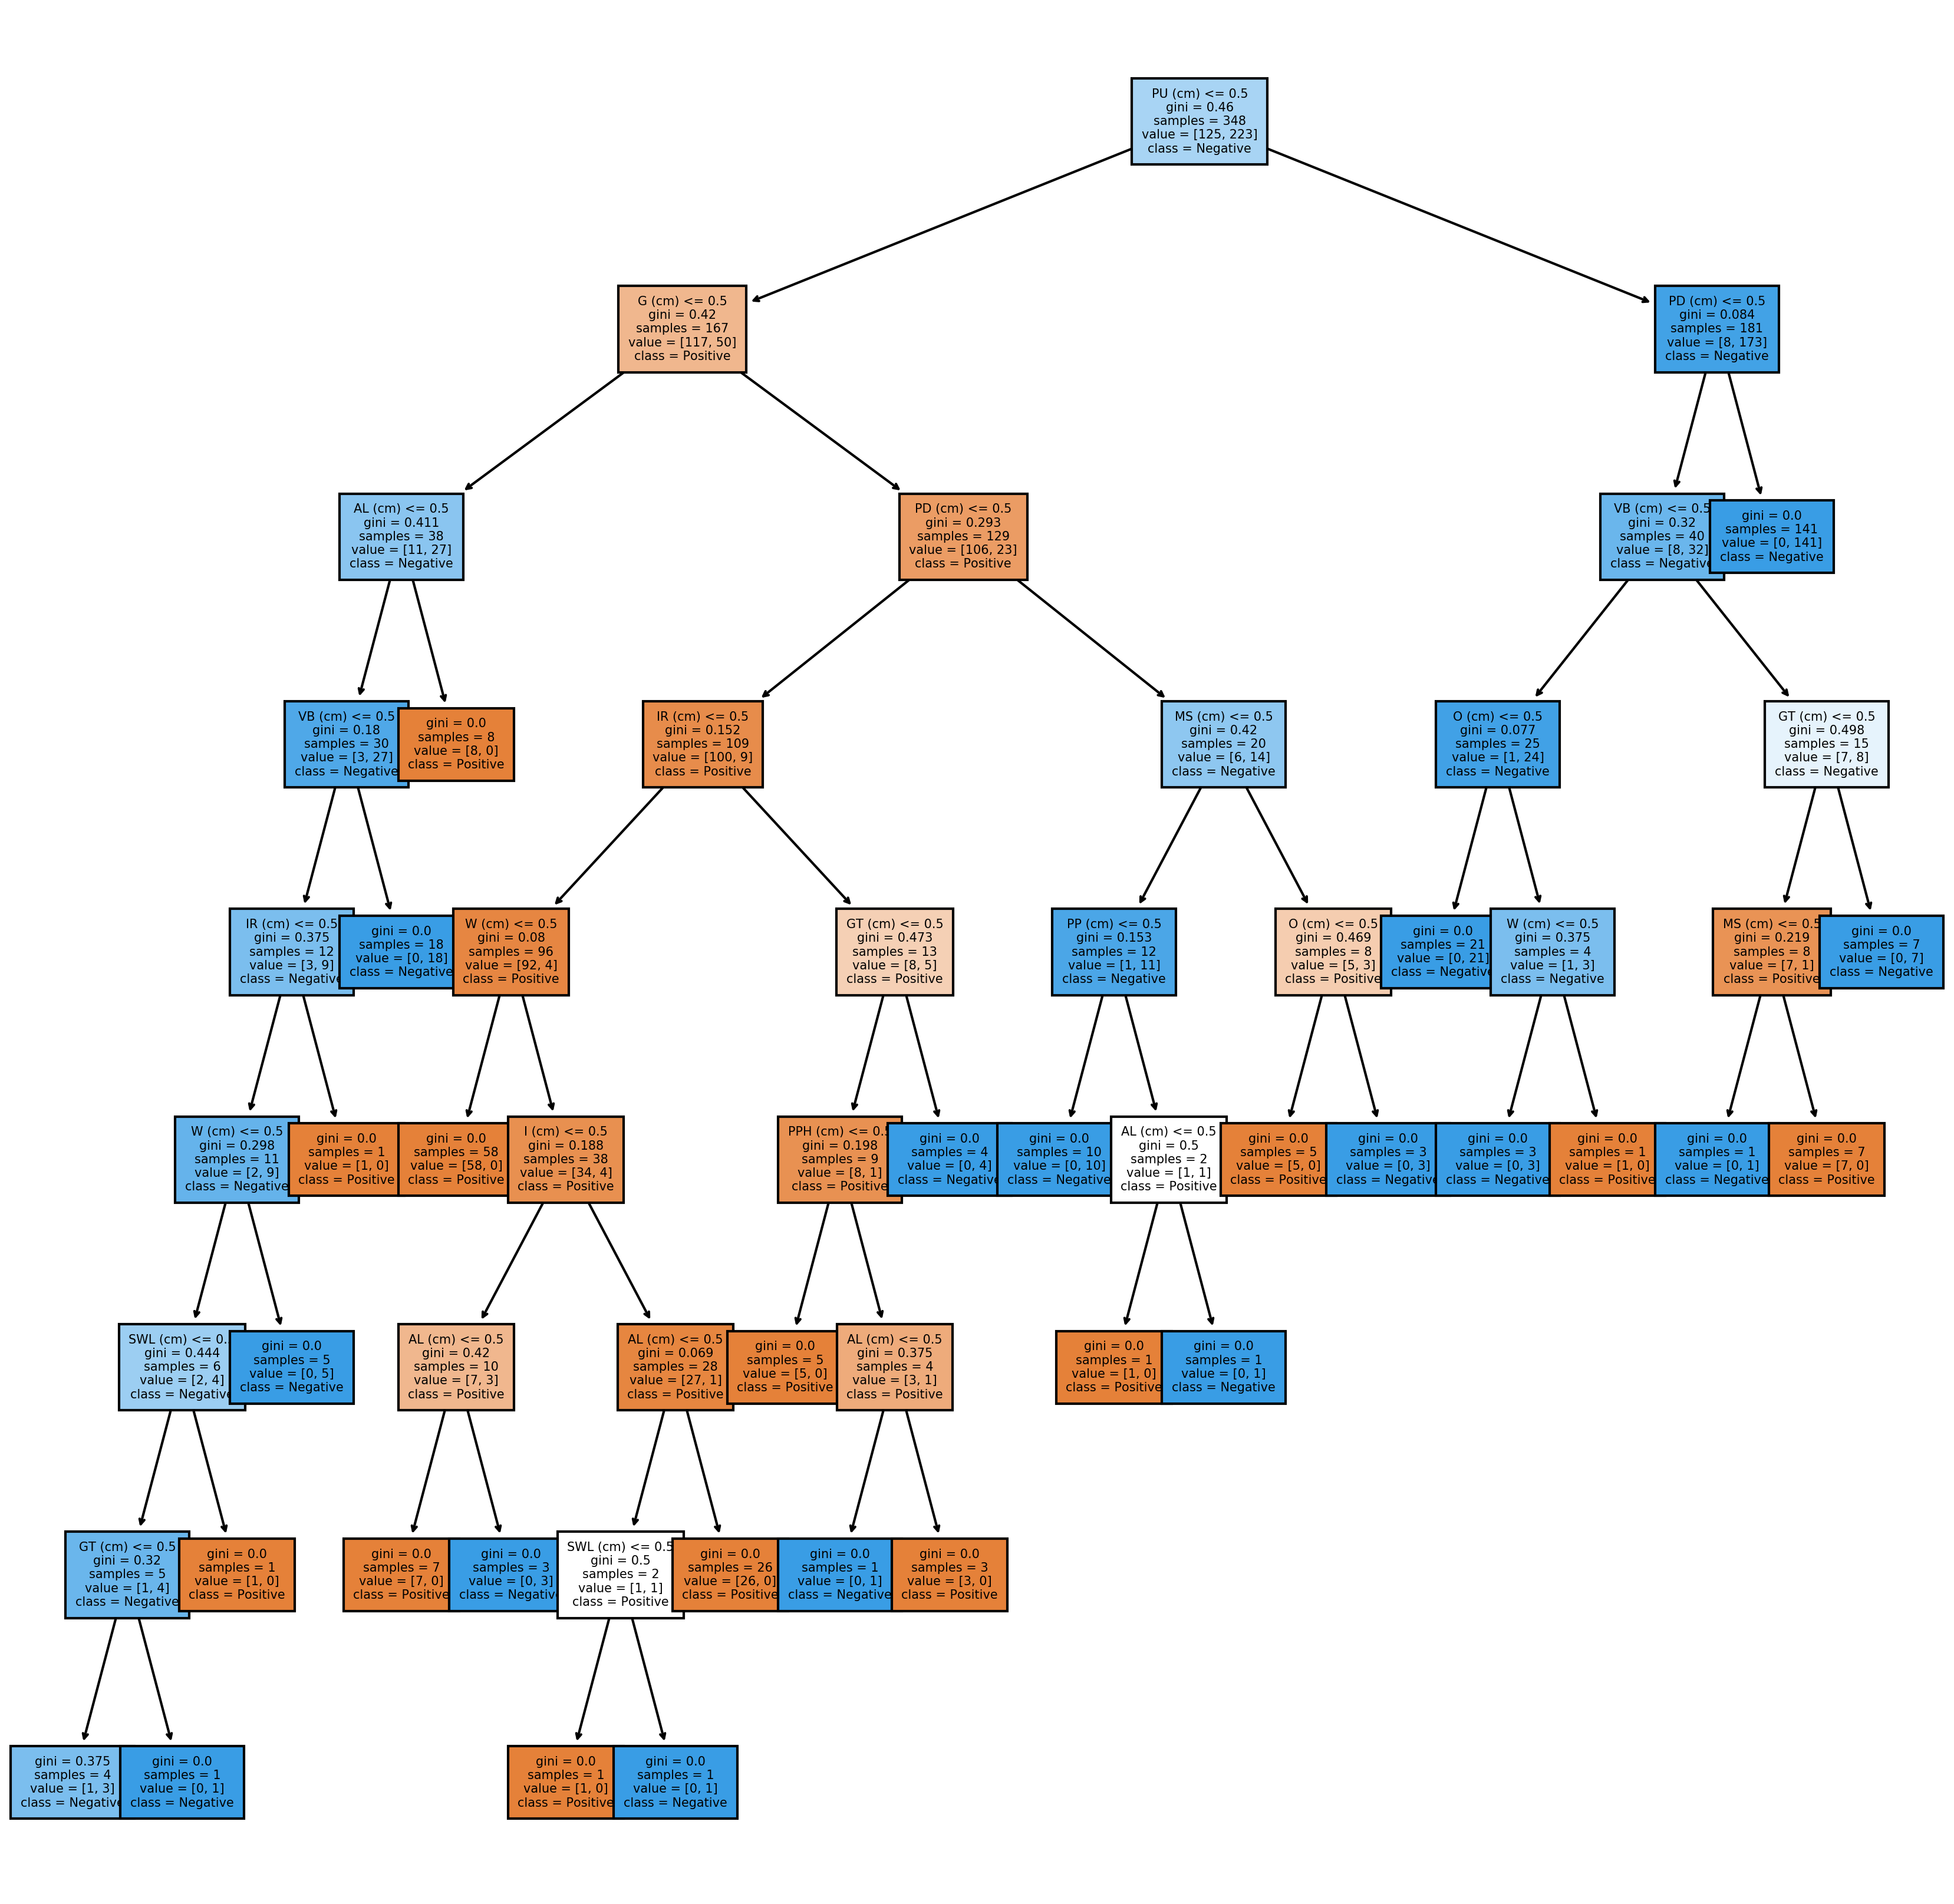

In [37]:
from sklearn.tree import plot_tree
#Gender	Polyuria	Polydipsia	sudden weight loss	weakness	Polyphagia	Genital thrush	visual blurring	Itching	Irritability	delayed healing	partial paresis	muscle stiffness	Alopecia	Obesity
fn=['G (cm)','PU (cm)','PD (cm)','SWL (cm)','W (cm)','PPH (cm)','GT (cm)','VB (cm)','I (cm)','IR (cm)','DH (cm)','PP (cm)','MS (cm)','AL (cm)','O (cm)']
cn=['Positive', 'Negative']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (14,14), dpi=300)
plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
          fontsize=5,
               filled = True);
fig.savefig('sam.png')

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[68,  7],
       [ 6, 91]], dtype=int64)

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred) * 100))
print('AUC: {:.2f}%'.format(roc_auc_score(y_test, dtc_predict_proba) * 100))
print('Classification report:\n\n', classification_report(y_test, y_pred))
print('Training set score: {:.2f}%'.format(dtc.score(X_train, y_train) * 100))
print('Testing set score: {:.2f}%'.format(dtc.score(X_test, y_test) * 100))

Accuracy: 92.44%
AUC: 93.92%
Classification report:

               precision    recall  f1-score   support

           0       0.92      0.91      0.91        75
           1       0.93      0.94      0.93        97

    accuracy                           0.92       172
   macro avg       0.92      0.92      0.92       172
weighted avg       0.92      0.92      0.92       172

Training set score: 99.71%
Testing set score: 92.44%


In [12]:
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

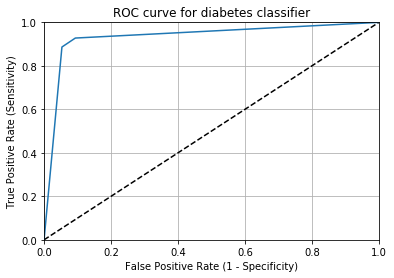

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, dtc_predict_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 10
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

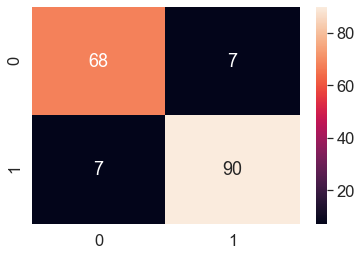

In [30]:
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes =True)
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [13]:
from dtreeviz.trees import *